In [ ]:
from AutoPyro.digitizers import digitizers
from AutoPyro.core import charts, data, calculators
from shapely import distance
from shapely.geometry import LineString
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DataTable

In [85]:
# my_data = data.DataTable.from_file('D:/University/Магистратура/2 курс/Диплом/Barents Sea.csv', sep=';')

In [86]:
df = pd.read_csv('D:/University/Магистратура/2 курс/Диплом/Barents Sea.csv', sep=';')
df = df[df["Age"] != "Not needed"]
J3_df = df.loc[df["Age"].str.match(r".*J3.*", na=False)].apply(pd.to_numeric, errors="ignore")
J3_source = J3_df.query("`S2 (mg/g TOC)` >= 0.5 & 398 <= Tmax <= 500")

In [87]:
J3_source

,Well,Structural element,Structural element Russian,Lithology,Depth (m),Sample type,Sample Condition,TOC (%),S0 (mg/g TOC),S1 (mg/g TOC),...,Age,Member / Formation,Group,Catagenic level Tmax based,Catagenic level Ro based,Catagenic level final,Organic matter type,TOCo,HIo,Comments
19,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2355,original,NaN,3.39,NaN,1.68,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК3,3.0,4.0341,240.00000,NaN
20,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,original,NaN,3.30,NaN,1.59,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,3.6300,240.00000,NaN
21,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,ws-dicl.,NaN,3.01,NaN,0.06,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,3.3110,240.00000,NaN
22,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2373,original,NaN,5.53,NaN,2.55,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,NaN,МК2,3.0,6.0830,240.00000,NaN
298,7119/9-1,Ringvassøy-Loppa Fault Complex,Разломная зона Рингвассой-Лоппа,NaN,2715,NaN,NaN,2.89,NaN,1.64,...,J3,HEKKINGEN FM,ADVENTDALEN GP,МК3,МК3,МК3,3.0,3.4391,190.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519,Shtokmanovskaya 4,Shtokman saddle,Штокмановская седловина,shale,1846,core,NaN,16.04,NaN,2.65,...,J3km,NaN,NaN,ПК3,NaN,ПК3,3.0,17.3232,281.48379,"Viskunova, 2006"
14520,Shtokmanovskaya 4,Shtokman saddle,Штокмановская седловина,shale,1846.1,core,NaN,15.90,NaN,2.66,...,J3km,NaN,NaN,ПК3,NaN,ПК3,3.0,17.1720,280.00000,"Viskunova, 2006"
14551,Shtokmanovskaya 5,Shtokman saddle,Штокмановская седловина,clay,1830,sludge,NaN,0.73,NaN,0.12,...,J3,NaN,NaN,MK1,NaN,MK1,3.0,0.7957,90.00000,"Viskunova, 2006"
14552,Shtokmanovskaya 5,Shtokman saddle,Штокмановская седловина,clay,1865,sludge,NaN,0.72,NaN,0.12,...,J3,NaN,NaN,MK1,NaN,MK1,3.0,0.7848,90.00000,"Viskunova, 2006"


In [88]:
J3_source.columns

Index(['Well', 'Structural element', 'Structural element Russian', 'Lithology',
       'Depth (m)', 'Sample type', 'Sample Condition', 'TOC (%)',
       'S0 (mg/g TOC)', 'S1 (mg/g TOC)', 'S2 (mg/g TOC)', 'S3 (mg/g TOC)',
       'HI', 'OI', 'PP', 'PI', 'S1+S2', 'Tmax', 'Ro (%)', 'Age',
       'Member / Formation', 'Group', 'Catagenic level Tmax based',
       'Catagenic level Ro based', 'Catagenic level final',
       'Organic matter type', 'TOCo', 'HIo', 'Comments'],
      dtype='object')

In [89]:
my_data = data.DataTable.from_dataframe(J3_source)

In [90]:
columns_needed = J3_source.loc[:, "S1":"Tmax"].columns.to_list()
columns_needed.remove('S1+S2')
columns_needed

['S1', 'S2', 'S3', 'HI', 'OI', 'PP', 'PI', 'Tmax']

In [76]:
result = my_data.get_statistics("TOC", group="Structural element Russian")

In [58]:
result

TOC             \
                                      Общее количество    Среднее   
Structural element Russian                                          
Арх. Земля Франца-Иосифа                          11.0   5.615455   
Арх. Шпицберген                                    1.0   5.910000   
Варандей-Адьзвинская структурная зона              5.0   1.130000   
Демидовско-Лудловский вал                          1.0   0.840000   
Платформа Бъярмелэнд                              20.0  11.444500   
Платформа Финнмарк                                22.0   8.456818   
Поднятие Норсель                                  17.0   7.072353   
Прогиб Нордкапп                                   12.0   5.253333   
Прогиб Фингердъюпет                               94.0   3.417979   
Прогиб Хаммерфест                                294.0   6.256156   
Разломная зона Мосэй                               9.0   5.280000   
Разломная зона Нислеппен                           7.0   8.291429   
Разломная зона Рингвассой-Лоппа                   10.0   6.673000   
Разломная зона Тромс-Финнмарк                      9.0   8.907778   
Свод Самсон                                       19.0   5.452632   
Ферсмановское поднятие                             1.0   9.910000   
Штокмановская седловина                           21.0   5.822857   
Южно-Баренцевская впадина                         17.0   9.214118   

                                                                              \
                                      Стандартное отклонение Минимум     25%   
Structural element Russian                                                     
Арх. Земля Франца-Иосифа                            2.040021    0.83  4.7600   
Арх. Шпицберген                                          NaN    5.91  5.9100   
Варандей-Адьзвинская структурная зона               0.486056    0.71  0.9400   
Демидовско-Лудловский вал                                NaN    0.84  0.8400   
Платформа Бъярмелэнд                                3.840531    4.20  9.1200   
Платформа Финнмарк                                  3.872729    2.00  5.9250   
Поднятие Норсель                                    2.851854    3.08  4.3100   
Прогиб Нордкапп                                     1.369242    3.62  4.1375   
Прогиб Фингердъюпет                                 2.388736    0.60  2.3525   
Прогиб Хаммерфест                                   3.725956    0.55  3.9200   
Разломная зона Мосэй                                2.954065    2.69  3.5000   
Разломная зона Нислеппен                            3.914794    2.40  5.9450   
Разломная зона Рингвассой-Лоппа                     3.352127    2.89  4.3250   
Разломная зона Тромс-Финнмарк                      12.059913    2.50  3.0100   
Свод Самсон                                         2.439346    1.00  4.1000   
Ферсмановское поднятие                                   NaN    9.91  9.9100   
Штокмановская седловина                             5.046178    0.72  1.7100   
Южно-Баренцевская впадина                           5.126768    1.06  5.2800   

                                                                       
                                      Медиана (50%)      75% Максимум  
Structural element Russian                                             
Арх. Земля Франца-Иосифа                      5.770   6.9100     8.21  
Арх. Шпицберген                               5.910   5.9100     5.91  
Варандей-Адьзвинская структурная зона         1.000   1.0300     1.97  
Демидовско-Лудловский вал                     0.840   0.8400     0.84  
Платформа Бъярмелэнд                         11.000  13.6250    19.40  
Платформа Финнмарк                            8.350  10.7100    15.80  
Поднятие Норсель                              6.860   9.3400    11.93  
Прогиб Нордкапп                               4.950   6.1225     7.80  
Прогиб Фингердъюпет                           2.795   3.5150    14.14  
Прогиб Хаммерфест                             4.800   8.

# Calculators

### HIo calculation

In [8]:
# my_data.calculate(
#     "HIo",
#     "plot",
#     author="Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021",
#     T_max=J3_df["Tmax"],
#     HI=J3_df["HI"],
# )

In [91]:
my_data.calculate(
    "HIo",
    "plot",
    author="Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021",
    HI=J3_source["HI"],
    T_max=J3_source["Tmax"],
)

g:\miniconda3\envs\ap\Lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
d:\Code\Python\AutoPyro Project\AutoPyro\core\data.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table[calculator.column_name] = getattr(calculator, option)(


In [ ]:
save = calculators.HIo.plot(
    author="Bouazizi, I & Moncef, S & Belhaj Mohamed, A, 2014",
    HI=J3_source["HI"],
    T_max=J3_source["Tmax"],
)
save

,Tmax,HI,Tmax_o,HIo
0,450.0,150.0,411.762793,217.544172
1,450.0,149.0,411.762793,217.544172
2,450.0,122.0,410.271074,166.630069
3,449.0,134.0,410.271074,166.630069
4,453.0,100.0,409.525215,141.173018
...,...,...,...,...
565,418.0,281.0,413.254511,268.458275
566,428.0,241.0,411.762793,217.544172
567,437.0,73.0,408.033496,46.934636
568,437.0,75.0,408.033496,50.544992


In [ ]:
save = calculators.HIo.plot(
    author="Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021",
    HI=J3_source["HI"],
    T_max=J3_source["Tmax"],
)
save

,Tmax,HI,Tmax_o,HIo
0,450.0,150.0,407.162283,187.878140
1,450.0,149.0,407.162283,187.878140
2,450.0,122.0,407.162283,152.091827
3,449.0,134.0,407.162283,161.038405
4,453.0,100.0,407.162283,143.145249
...,...,...,...,...
565,418.0,281.0,406.515132,268.495901
566,428.0,241.0,406.946566,238.608268
567,437.0,73.0,407.162283,71.572625
568,437.0,75.0,407.162283,71.572625


TOCo

In [ ]:
calculators.TOCo.Neruchev_1998(
    maturity_level=J3_source["Catagenic level final"],
    TOC=J3_source["TOC"],
    organic_matter=J3_source["Organic matter type"]
).to_clipboard()

In [9]:
my_data.table.columns

Index(['Well', 'Structural element', 'Structural element Russian', 'Lithology',
       'Depth', 'Sample type', 'Sample Condition', 'TOC', 'S0', 'S1', 'S2',
       'S3', 'HI', 'OI', 'PP', 'PI', 'S1+S2', 'Tmax', 'Ro', 'Age',
       'Member / Formation', 'Group', 'Catagenic level Tmax based',
       'Catagenic level Ro based', 'Catagenic level final',
       'Organic matter type', 'TOCo', 'HIo', 'Comments'],
      dtype='object')

TR

In [12]:
calculators.TR.Espitalie_1987(HI_o=J3_df["HIo"], HI=J3_df["HI"])

18                 NaN
19       472500.000000
20       478205.000000
21       636020.000000
22       564980.000000
             ...      
14520    160290.000000
14550    773333.333333
14551    255453.333333
14552    225000.000000
14615    447744.000000
Length: 670, dtype: float64

# Digitizer + Plots

In [2]:
real_data = pd.read_csv('D:/University/Магистратура/2 курс/Диплом/HI-Tmax_DB.csv', sep=';')
real_data

,Well,Structural element,Structural element Russian,Lithology,Depth,Sample type,Sample Condition,TOC,S0,S1,S2,S3,HI,OI,PP,PI,S1+S2,Tmax,Ro,Age
0,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2355,original,NaN,3.39,NaN,1.68,5.09,0.60,150.0,18.0,6.77,0.25,6.77,450,NaN,J3
1,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,original,NaN,3.30,NaN,1.59,4.91,0.58,149.0,18.0,6.50,0.24,6.50,450,NaN,J3
2,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2364,ws-dicl.,NaN,3.01,NaN,0.06,3.66,0.63,122.0,21.0,3.72,0.02,3.72,450,NaN,J3
3,7019/1-1,Troms-Finnmark Fault Complex,Разломная зона Тромс-Финнмарк,NaN,2373,original,NaN,5.53,NaN,2.55,7.39,0.66,134.0,12.0,9.94,0.26,9.94,449,NaN,J3
4,7119/9-1,Ringvassøy-Loppa Fault Complex,Разломная зона Рингвассой-Лоппа,NaN,2715,NaN,NaN,2.89,NaN,1.64,2.96,0.75,100.0,25.0,4.60,0.36,4.60,453,0.925,J3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,Pioner,Severnaya Zemlya,Арх. Северная Земля,NaN,NaN,NaN,NaN,0.58,NaN,0.04,0.76,NaN,131.0,34.0,0.80,0.05,0.80,424,NaN,D1
3538,Pioner,Severnaya Zemlya,Арх. Северная Земля,NaN,NaN,NaN,NaN,0.46,NaN,0.11,1.54,NaN,335.0,11.0,1.65,0.06,1.65,428,NaN,D1
3539,Figurniy,Severnaya Zemlya,Арх. Северная Земля,NaN,NaN,NaN,NaN,0.83,NaN,0.11,1.76,NaN,212.0,12.0,1.87,0.06,1.87,432,NaN,S1
3540,Figurniy,Severnaya Zemlya,Арх. Северная Земля,NaN,NaN,NaN,NaN,7.79,NaN,1.82,32.08,NaN,412.0,4.0,33.90,0.05,33.90,426,NaN,S1


In [24]:
# HI_Tmax_plots = glob("D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/*.svg")
# S2_TOC_plots = glob("D:/University/Магистратура/2 курс/Диплом/Графики/S2-TOC/*.svg")
# PI_Tmax_plots = glob("D:/University/Магистратура/2 курс/Диплом/Графики/PI-Tmax/*.svg")
# HI_OI_plots = glob("D:/University/Магистратура/2 курс/Диплом/Графики/HI-OI/*.svg")

In [25]:
# HI_Tmax_plots

# Convert SVG to JSON and View

## $HI-T_{max}$

### Akram, R & Faqi, A & Jihad, W & Sherwani, G & Al-Ansari, N, 2021

In [50]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/Akram, R & Faqi, A & Jihad, W & Sherwani, G & Al-Ansari, N, 2021.svg"

In [51]:
divider=False

In [4]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=divider))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


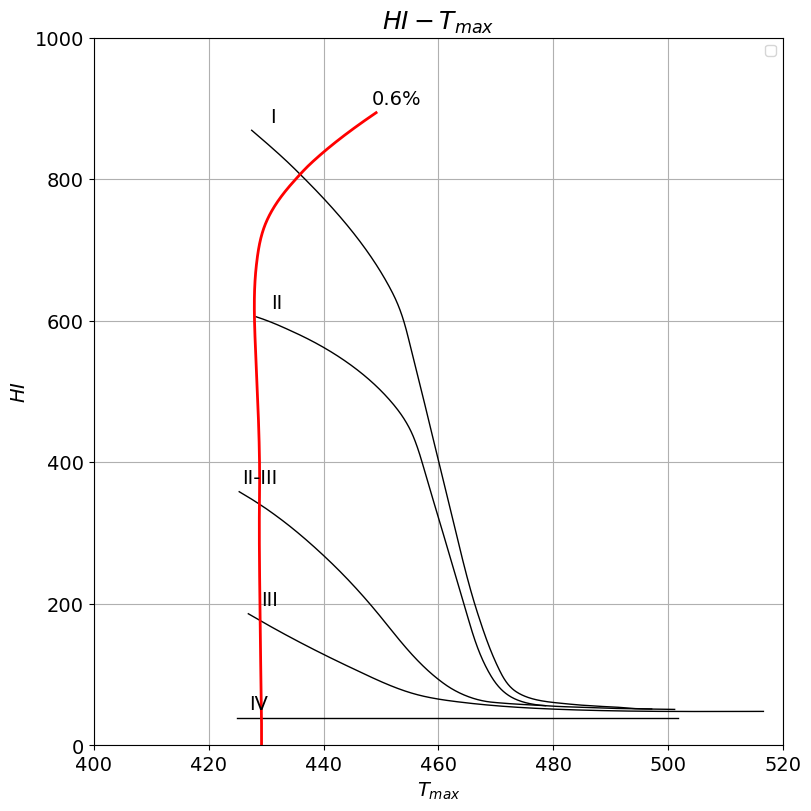

In [6]:
fig, ax = my_plot.plot(title="$HI-T_{max}$", labels=("$T_{max}$", "$HI$"), figsize=(8, 8), plot_areas=False, grid=True);

In [29]:
for _, r in save.iterrows():
    ax.plot(r["Tmax"], r["HI"], 'b.')
    ax.plot(r["Tmax_o"], r["HIo"], 'g.')

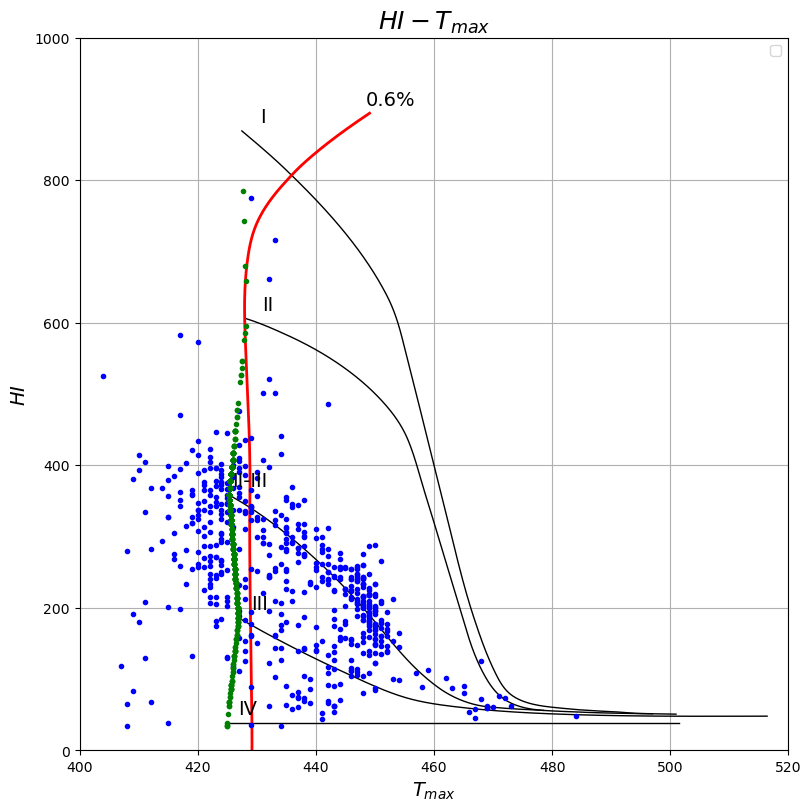

In [30]:
fig

In [20]:
svg_sample.convert_to_json(divider=divider)

### Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021

In [170]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/Barberes, G & Reis, R & Pimentel, N. & Spigolon, A.L.D. & Fonseca, P. & Karcz, P & Azevedo, M. & Barata, T, 2021.svg"

In [171]:
divider=False

In [172]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 1000)))

In [ ]:
my_plot = charts.Charttt.from_dict(svg_sample.convert_to_dict(divider=divider))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


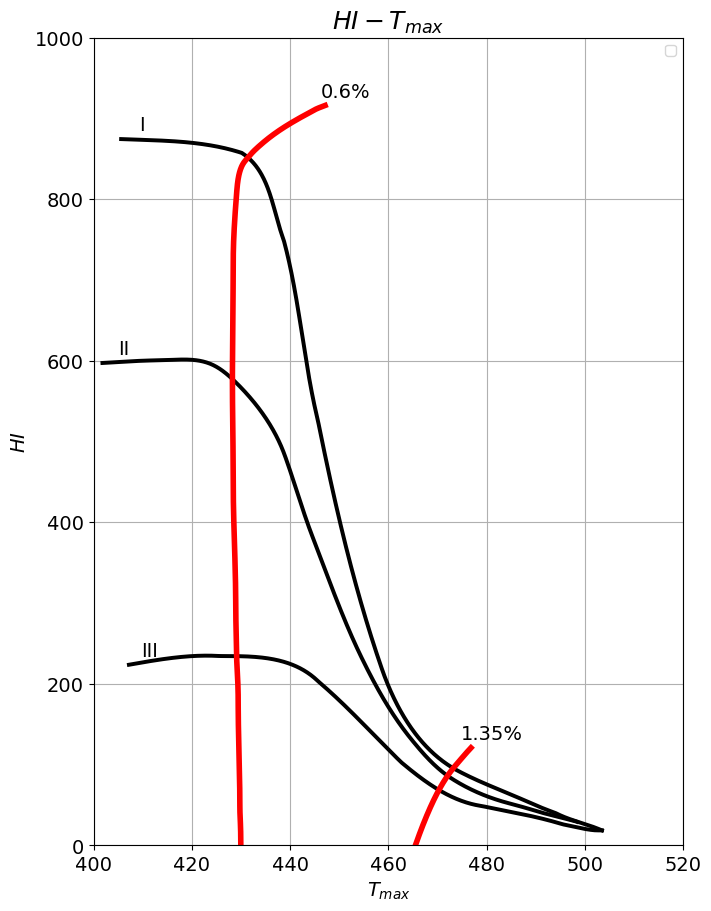

In [177]:
fig, ax = my_plot.plot(title="$HI-T_{max}$", labels=("$T_{max}$", "$HI$"), figsize=(7, 9), plot_areas=False, grid=True);

In [178]:
for _, r in save.iterrows():
    ax.plot(r["Tmax"], r["HI"], 'b.')
    # ax.plot(r["Tmax_o"], r["HIo"], 'g.')

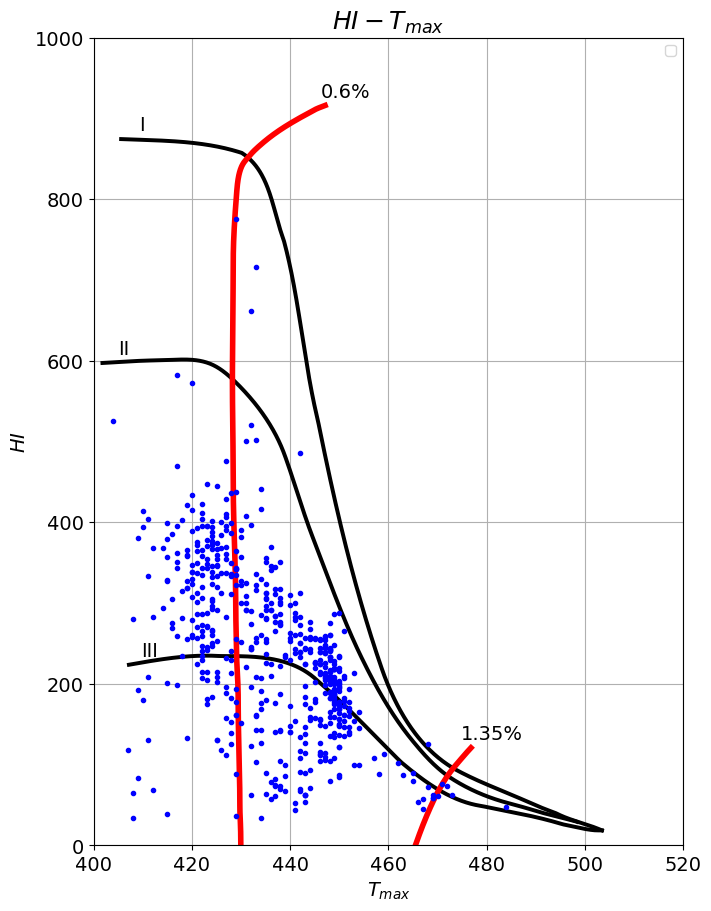

In [179]:
fig

In [180]:
save

,Tmax,HI,Tmax_o,HIo
0,450.0,150.0,407.162283,187.878140
1,450.0,149.0,407.162283,187.878140
2,450.0,122.0,407.162283,152.091827
3,449.0,134.0,407.162283,161.038405
4,453.0,100.0,407.162283,143.145249
...,...,...,...,...
565,418.0,281.0,406.515132,268.495901
566,428.0,241.0,406.946566,238.608268
567,437.0,73.0,407.162283,71.572625
568,437.0,75.0,407.162283,71.572625


In [49]:
svg_sample.convert_to_json(divider=divider)

### Bouazizi, I & Moncef, S & Belhaj Mohamed, A, 2014

In [77]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/Bouazizi, I & Moncef, S & Belhaj Mohamed, A, 2014.svg"

In [78]:
divider=False

In [79]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 900)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=divider))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


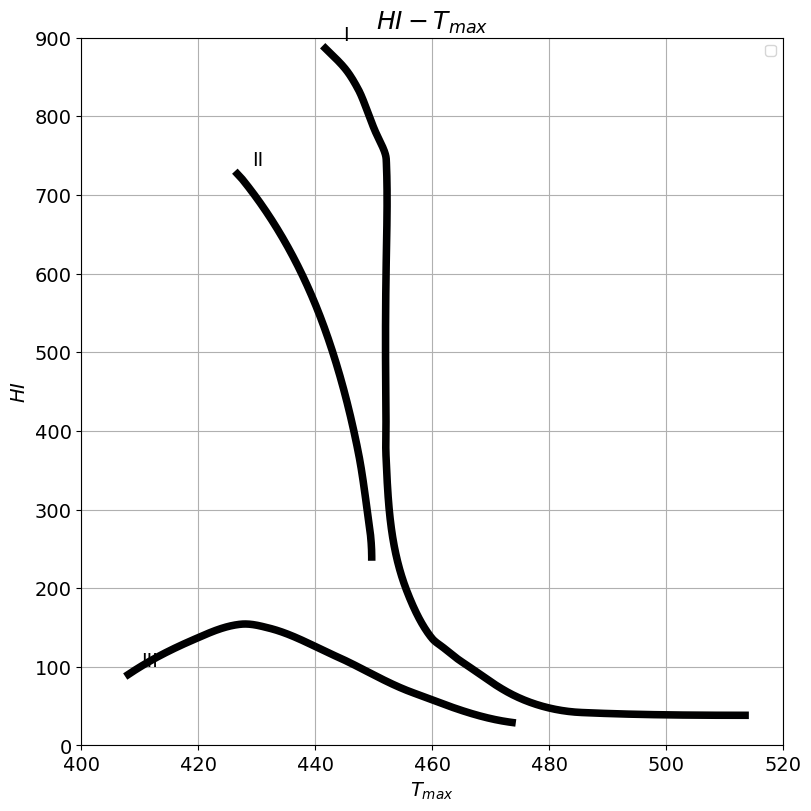

In [81]:
fig, ax = my_plot.plot(title="$HI-T_{max}$", labels=("$T_{max}$", "$HI$"), figsize=(8, 8), plot_areas=False, grid=True, place="left");

In [82]:
for _, r in save.iterrows():
    ax.plot(r["Tmax"], r["HI"], 'b.')
    ax.plot(r["Tmax_o"], r["HIo"], 'g.')

In [84]:
save

,Tmax,HI,Tmax_o,HIo
0,450.0,150.0,411.762793,217.544172
1,450.0,149.0,411.762793,217.544172
2,450.0,122.0,410.271074,166.630069
3,449.0,134.0,410.271074,166.630069
4,453.0,100.0,409.525215,141.173018
...,...,...,...,...
565,418.0,281.0,413.254511,268.458275
566,428.0,241.0,411.762793,217.544172
567,437.0,73.0,408.033496,46.934636
568,437.0,75.0,408.033496,50.544992


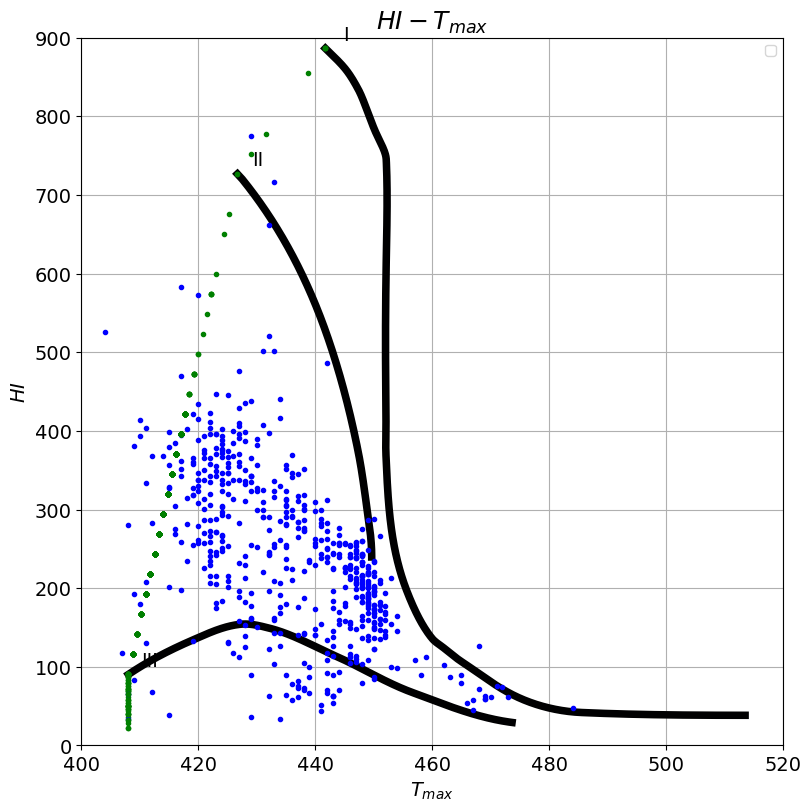

In [83]:
fig

In [75]:
svg_sample.convert_to_json(divider=divider)

### Burgan, A & Ali, Ch, 2009

In [63]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-Tmax/Burgan, A & Ali, Ch, 2009.svg"

In [64]:
divider=False

In [65]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((410, 0), (550, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=divider))

AttributeError: 'NoneType' object has no attribute 'groups'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


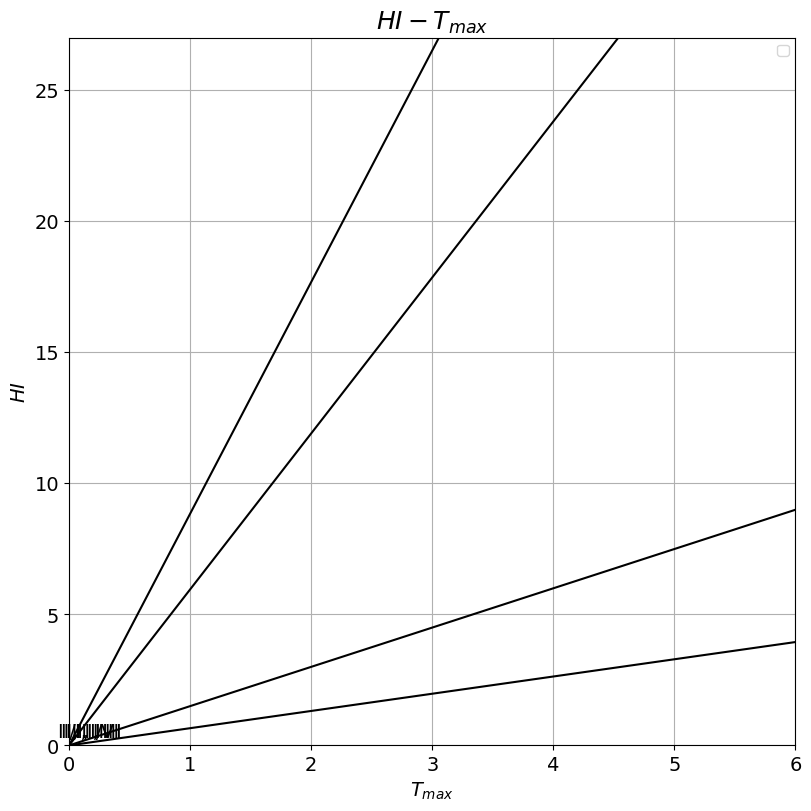

In [67]:
fig, ax = my_plot.plot(title="$HI-T_{max}$", labels=("$T_{max}$", "$HI$"), figsize=(8, 8), plot_areas=False, grid=True, place="left");

In [ ]:
svg_sample.convert_to_json(divider=divider)

## $S_2-TOC$

### Zeb, Sh & Zafar, M & Jehandad, S & Khan, T & Siyar, S & Qadir, A, 2020

In [58]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S2-TOC/Zeb, Sh & Zafar, M & Jehandad, S & Khan, T & Siyar, S & Qadir, A, 2020.svg"

In [59]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (3, 11)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=True))

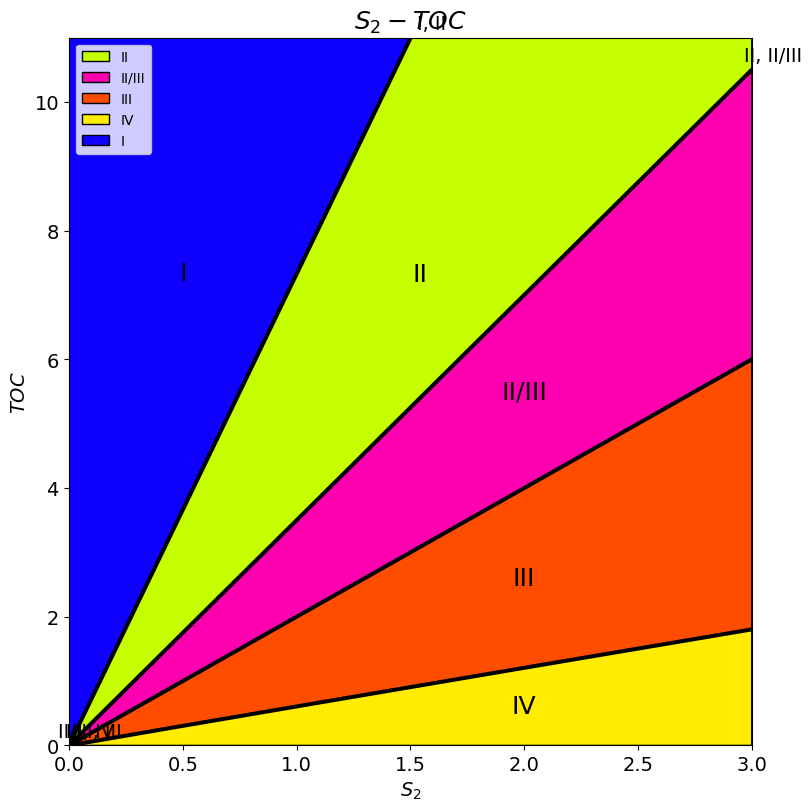

In [61]:
my_plot.plot(title="$S_2-TOC$", labels=("$S_2$", "$TOC$"), figsize=(8, 8), plot_areas=True);

In [56]:
svg_sample.convert_to_json(divider=False)

#### Chen, z & Lavoie, D & Jiang, Ch & Duchesne, M & Malo, M, 2016

In [11]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S2-TOC/Chen, z & Lavoie, D & Jiang, Ch & Duchesne, M & Malo, M, 2016.svg"

In [12]:
divider=True

In [13]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (6, 27)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=True))

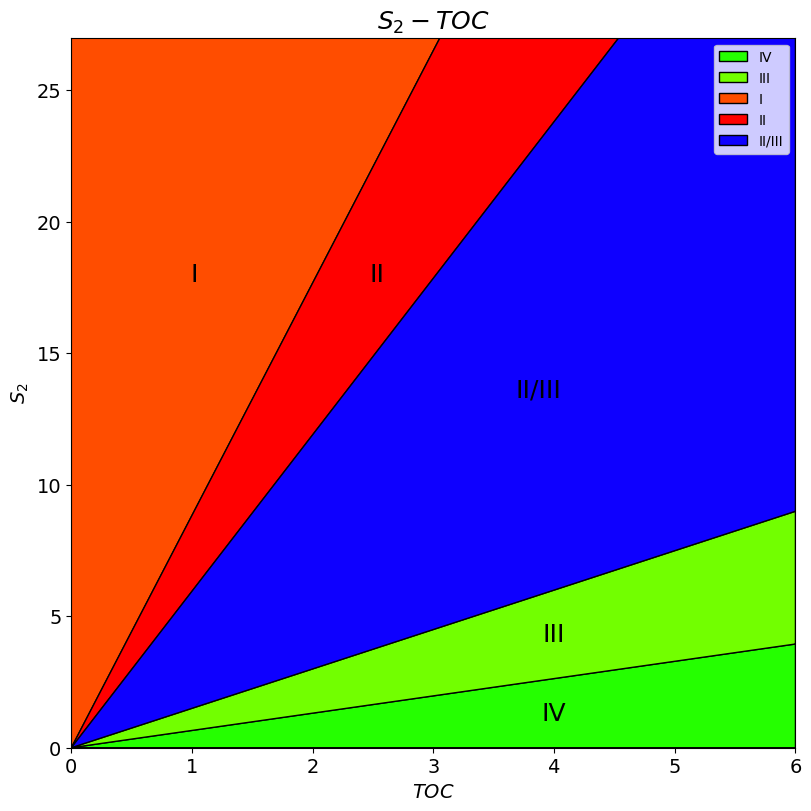

In [15]:
my_plot.plot(title="$S_2-TOC$", labels=("$TOC$", "$S_2$"), figsize=(8, 8), plot_areas=True, place="center", plot_curves=False);

In [16]:
svg_sample.convert_to_json(divider=divider)

## $HI-OI$

### Burgan, A & Ali, Ch, 2009

In [40]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-OI/Burgan, A & Ali, Ch, 2009.svg"

In [41]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (125, 800)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=False))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


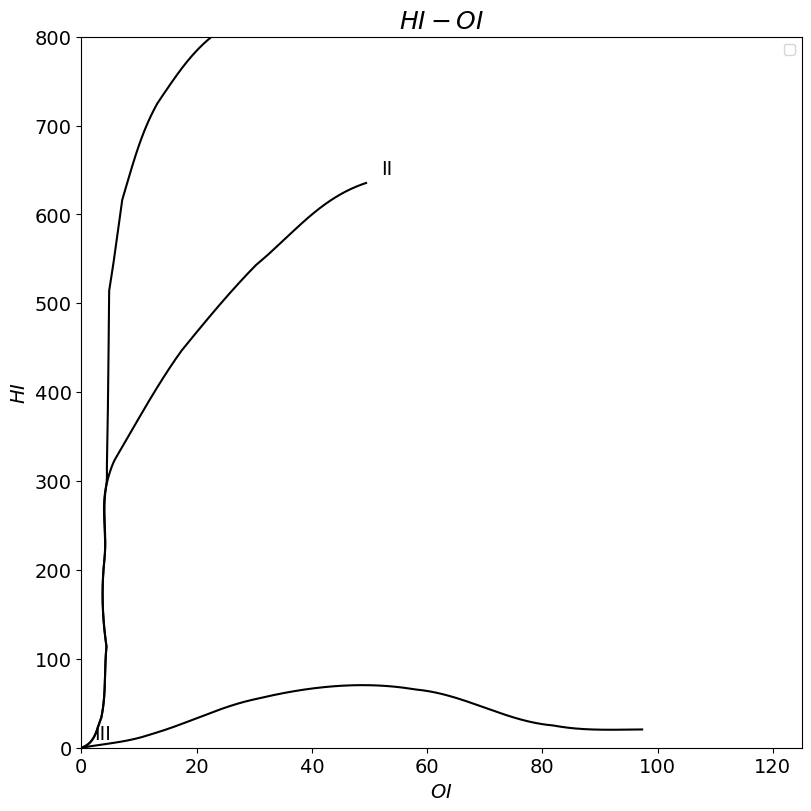

In [43]:
my_plot.plot(title="$HI-OI$", labels=("$OI$", "$HI$"), figsize=(8, 8), plot_areas=False);

In [ ]:
svg_sample.convert_to_json(divider=False)

### Hackley, P & Lunsdorf, N, 2018

In [18]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/HI-OI/Hackley, P & Lunsdorf, N, 2018.svg"

In [19]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0, 0), (200, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(divider=False))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


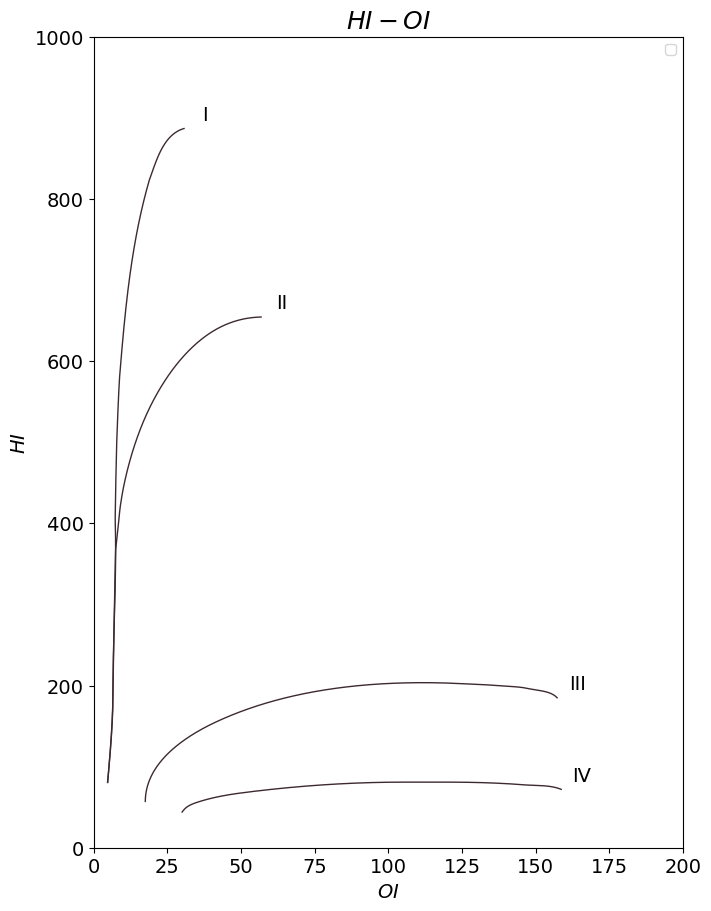

In [21]:
my_plot.plot(title="$HI-OI$", labels=("$OI$", "$HI$"), figsize=(7, 9), plot_areas=False);

In [22]:
svg_sample.convert_to_json(divider=False)

## $S1+S2-TOC$

### Spasennykh, M, Maglevannaia, P, Kozlova, E, Bulatov, T, Leushina, E, Morozov, N, 2021

In [107]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S1+S2-TOC/Spasennykh, M, Maglevannaia, P, Kozlova, E, Bulatov, T, Leushina, E, Morozov, N, 2021.svg"

In [108]:
divider=True

In [109]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0.1, 0.1), (100, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(log=True, divider=divider))

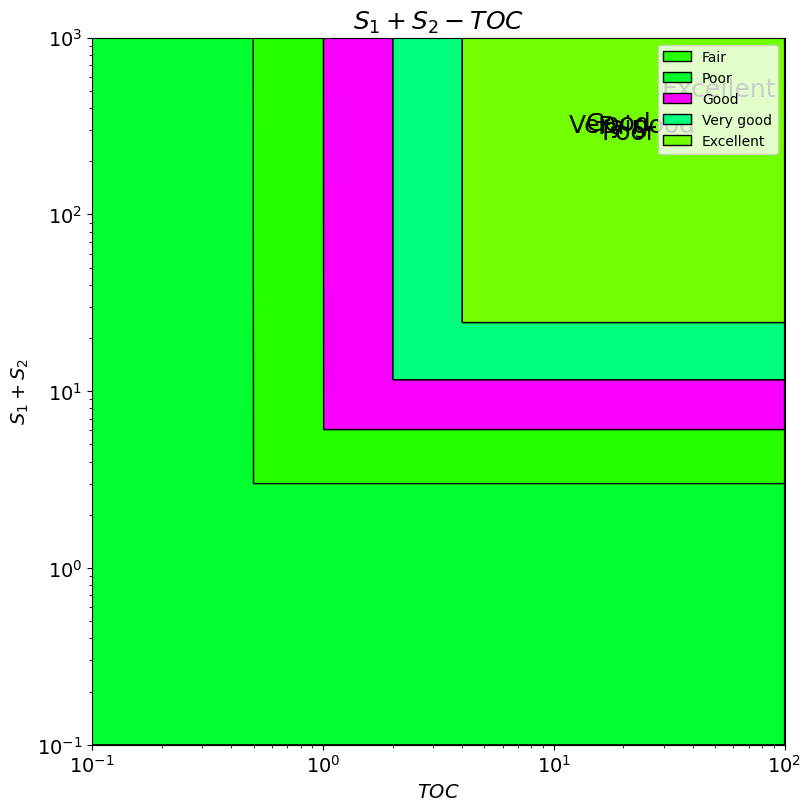

In [124]:
fig, ax = my_plot.plot(title="$S_1+S_2-TOC$", labels=("$TOC$", "$S_1+S_2$"), figsize=(8, 8), plot_areas=True, plot_curves=False, log=True);

In [11]:
svg_sample.convert_to_json(divider=divider)

### Maky, A & Sayed, M & Abdullah, Z, 2010

In [39]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S1+S2-TOC/Maky, A & Sayed, M & Abdullah, Z, 2010.svg"

In [40]:
divider=True

In [41]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0.2, 0.1), (100, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(log=True, divider=divider))

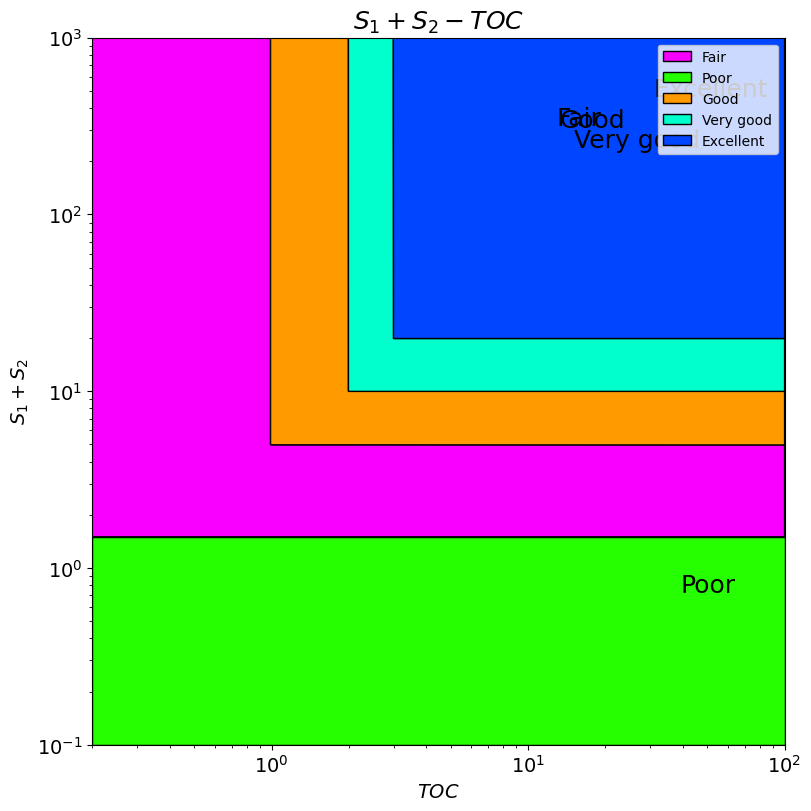

In [43]:
fig, ax = my_plot.plot(title="$S_1+S_2-TOC$", labels=("$TOC$", "$S_1+S_2$"), figsize=(8, 8), plot_areas=True, plot_curves=False, log=True);

In [38]:
svg_sample.convert_to_json(divider=divider)

### Edress, N & Darwish, S & Ismail, A, 2021

In [27]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/S1+S2-TOC/Edress, N & Darwish, S & Ismail, A, 2021.svg"

In [28]:
divider=True

In [29]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((0.1, 0.1), (100, 1000)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(log=True, divider=divider))

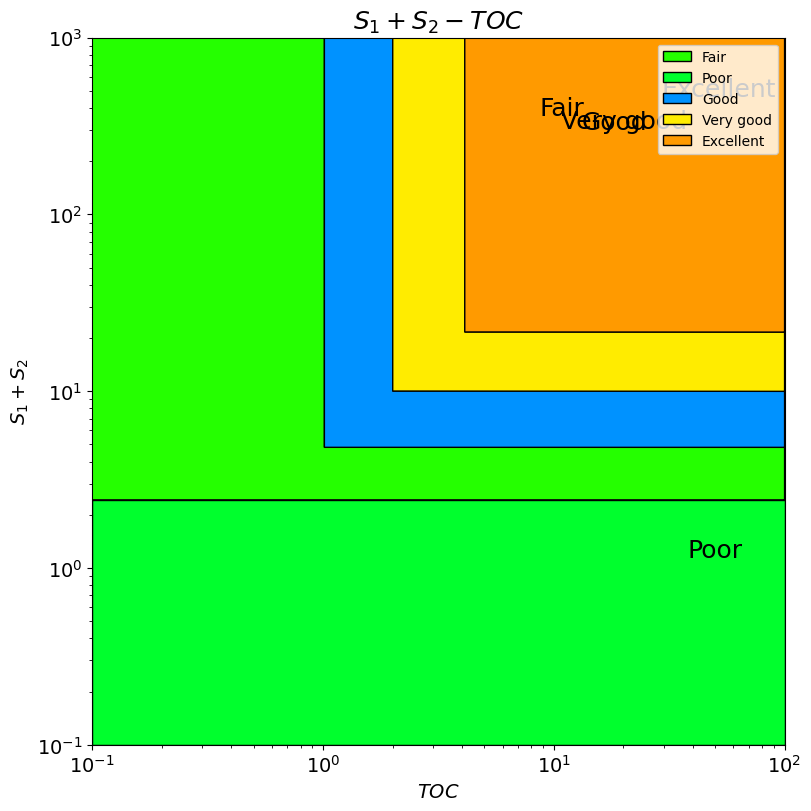

In [31]:
fig, ax = my_plot.plot(title="$S_1+S_2-TOC$", labels=("$TOC$", "$S_1+S_2$"), figsize=(8, 8), plot_areas=True, plot_curves=False, log=True);

In [32]:
svg_sample.convert_to_json(divider=divider)

## $PI-T_{max}$

### Akram, R & Faqi, A & Jihad, W & Sherwani, G & Al-Ansari, N, 2021

In [62]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/PI-Tmax/Akram, R & Faqi, A & Jihad, W & Sherwani, G & Al-Ansari, N, 2021.svg"

In [63]:
divider=True

In [64]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((400, 0), (520, 1)))

In [65]:
svg_sample.convert_to_dict(log=False, divider=divider)

{'name': 'Akram, R & Faqi, A & Jihad, W & Sherwani, G & Al-Ansari, N, 2021',
 'title': 'PI-Tmax',
 'settings': {'xlim': (400, 520),
  'ylim': (0, 1),
  'log': False,
  'grid': True,
  'legend': True},
 'labels': {'MATURITY': ['Low Level Conversion',
   'High Level Conversion',
   'Immature',
   'Oil Window',
   'Oil Window',
   'Condensate-Wet Gas Zone',
   'Condensate-Wet Gas Zone',
   'Dry Gas Window']},
 'data': {'curves': {'MATURITY: Low Level Conversion, High Level Conversion': {'color': '#35b343',
    'width': 2.0,
    'label': {'name': 'MATURITY',
     'value': ['Low Level Conversion', 'High Level Conversion'],
     'divider': True},
    'equation': {'curve_type': None, 'params': []},
    'points': {'x': [400.0,
      400.12012012281355,
      400.2402402456185,
      400.36036036841494,
      400.4804804912028,
      400.60060061398224,
      400.72072073675315,
      400.84084085951554,
      400.96096098226957,
      401.08108110501513,
      401.2012012277522,
      401.3213

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(log=False, divider=divider))

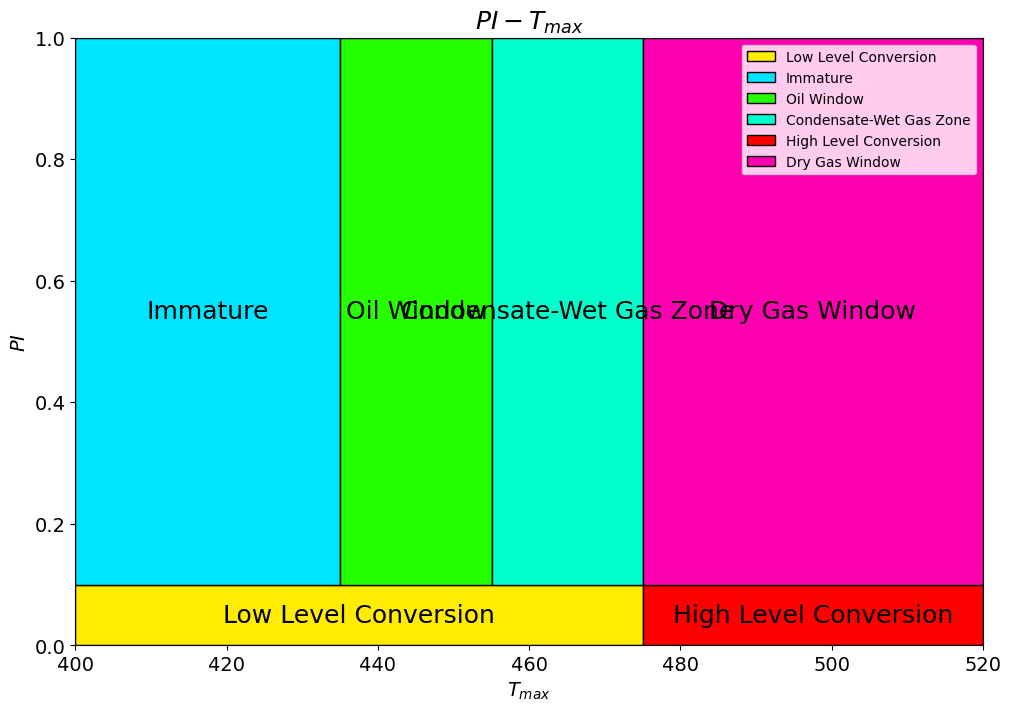

In [81]:
my_plot.plot(title="$PI-T_{max}$", labels=("$T_{max}$", "$PI$"), figsize=(10, 7), plot_areas=True, plot_curves=False);

In [68]:
svg_sample.convert_to_json(divider=divider)

### Edress, N & Darwish, S & Ismail, A, 2021

In [23]:
svg_path = "D:/University/Магистратура/2 курс/Диплом/Графики/PI-Tmax/Edress, N & Darwish, S & Ismail, A, 2021.svg"

In [24]:
divider=True

In [25]:
svg_sample = digitizers.SVGParse.from_svg(svg_path, ((380, 0), (500, 1)))

In [ ]:
my_plot = charts.Chart.from_dict(svg_sample.convert_to_dict(log=False, divider=divider))

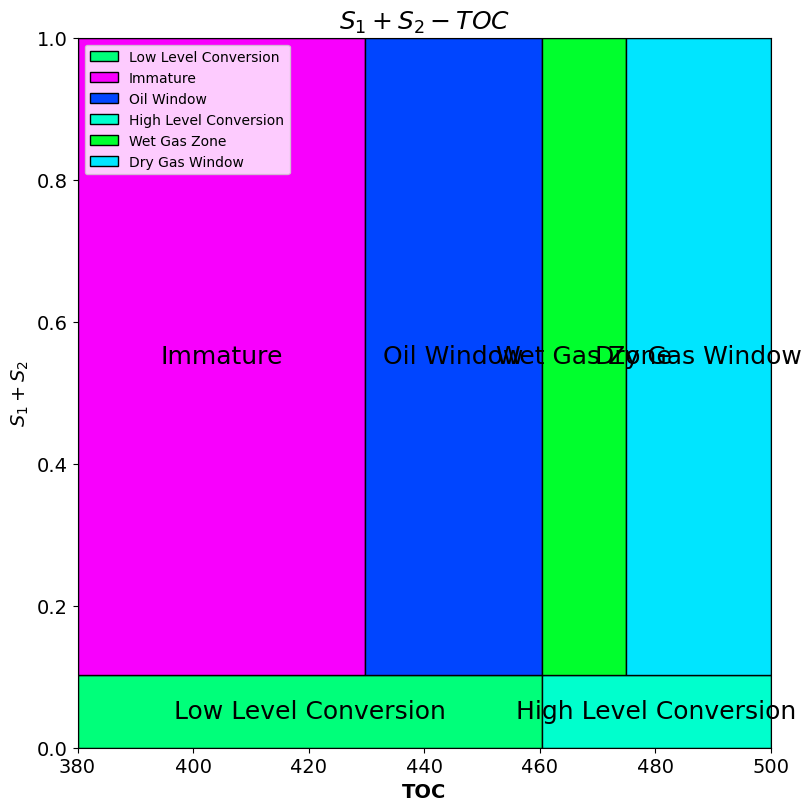

In [30]:
my_plot.plot(title="$S_1+S_2-TOC$", labels=("TOC", "$S_1+S_2$"), figsize=(8, 8), plot_areas=True, plot_curves=False);

In [ ]:
svg_sample.convert_to_json(divider=divider)

## Test real data

In [ ]:
df = real_data[(real_data['Well'] == '7120/2-2') & (real_data['Age'] == 'J3')]
x_all = df['TOC'].to_numpy()
y_all = df['S2'].to_numpy()

In [ ]:
df = real_data[(real_data['Well'] == '7019/1-1') & (real_data['Age'] == 'J3')]
x_all = df['OI'].to_numpy()
y_all = df['HI'].to_numpy()

In [ ]:
df = real_data[(real_data['Well'] == '7120/2-2') & (real_data['Age'] == 'J3')]
x_all = df['Tmax'].to_numpy()
y_all = df['HI'].to_numpy()

In [ ]:
df = real_data[(real_data['Well'] == '7120/2-2') & (real_data['Age'] == 'J3')]
x_all = df['Tmax'].to_numpy()
y_all = df['PI'].to_numpy()

In [ ]:
y_all

array([139., 189., 226., 227., 205., 245., 233., 244., 257., 258., 217.,
       238., 209., 240., 260., 260., 210., 247., 202., 221., 225., 224.,
       183., 213., 195., 226., 233., 233., 204., 238., 216., 255., 242.,
       241., 203., 208., 210., 215., 207., 208., 159., 211., 220., 216.,
       218., 218., 177., 213., 194., 218., 224., 225., 178., 205., 207.,
       206., 201., 200., 172., 202., 175., 188., 196., 197., 160., 191.,
       194., 183., 201., 200., 154., 190., 174., 174., 147., 190., 179.,
       179., 154., 182., 180., 145., 170., 200., 187., 157., 156., 148.,
       169., 169., 164., 193., 193., 159., 161., 161., 169.])

In [ ]:
x_all

array([449, 447, 445, 445, 447, 447, 450, 448, 444, 444, 448, 447, 449,
       447, 448, 448, 448, 447, 448, 447, 446, 446, 448, 447, 450, 447,
       448, 448, 449, 447, 450, 444, 448, 448, 450, 448, 451, 448, 447,
       447, 449, 447, 450, 448, 449, 449, 449, 453, 449, 449, 443, 443,
       450, 448, 451, 449, 448, 448, 450, 449, 443, 449, 450, 450, 452,
       450, 452, 451, 450, 450, 451, 449, 450, 450, 451, 448, 451, 451,
       453, 449, 449, 454, 452, 449, 449, 450, 450, 450, 450, 450, 450,
       449, 449, 448, 451, 451, 449], dtype=int64)

In [ ]:
points = [charts.LabeledPoint(x, y) for x, y in zip(x_all, y_all)]
my_plot.add(*points)

In [ ]:
for p in my_plot.points:
    print(p.get_coords())

(1.0, 1.39)
(2.9, 5.47)
(4.8, 10.86)
(4.8, 10.9)
(3.92, 8.04)
(5.0, 12.23)
(5.1, 11.86)
(4.8, 11.73)
(5.0, 12.87)
(5.0, 12.9)
(4.06, 8.8)
(5.0, 11.92)
(4.2, 8.76)
(4.4, 10.57)
(4.5, 11.7)
(4.5, 11.7)
(3.61, 7.59)
(4.0, 9.89)
(3.4, 6.88)
(3.9, 8.62)
(4.5, 10.11)
(4.5, 10.1)
(3.81, 6.99)
(4.9, 10.46)
(5.3, 10.36)
(4.7, 10.64)
(4.8, 11.19)
(4.8, 11.2)
(3.86, 7.88)
(4.8, 11.4)
(4.8, 10.38)
(4.9, 12.49)
(4.6, 11.15)
(4.6, 11.1)
(3.75, 7.63)
(4.8, 10.0)
(4.8, 10.07)
(4.9, 10.54)
(5.1, 10.55)
(5.1, 10.6)
(4.27, 6.8)
(5.4, 11.39)
(4.8, 10.54)
(5.1, 11.02)
(5.0, 10.9)
(5.0, 10.9)
(4.01, 7.1)
(4.9, 10.45)
(4.8, 9.29)
(4.6, 10.05)
(4.4, 9.86)
(4.4, 9.9)
(3.58, 6.39)
(4.2, 8.62)
(4.2, 8.7)
(4.1, 8.46)
(3.9, 7.84)
(3.9, 7.8)
(3.23, 5.55)
(3.7, 7.47)
(3.7, 6.48)
(3.8, 7.16)
(3.8, 7.46)
(3.8, 7.5)
(3.2, 5.11)
(3.9, 7.45)
(3.5, 6.78)
(4.2, 7.67)
(4.2, 8.45)
(4.2, 8.4)
(3.55, 5.46)
(4.2, 7.98)
(4.2, 7.29)
(4.2, 7.3)
(3.52, 5.17)
(4.2, 8.0)
(3.9, 6.99)
(3.9, 7.0)
(3.38, 5.22)
(4.1, 7.45)
(4.1, 7.4)
(3.2

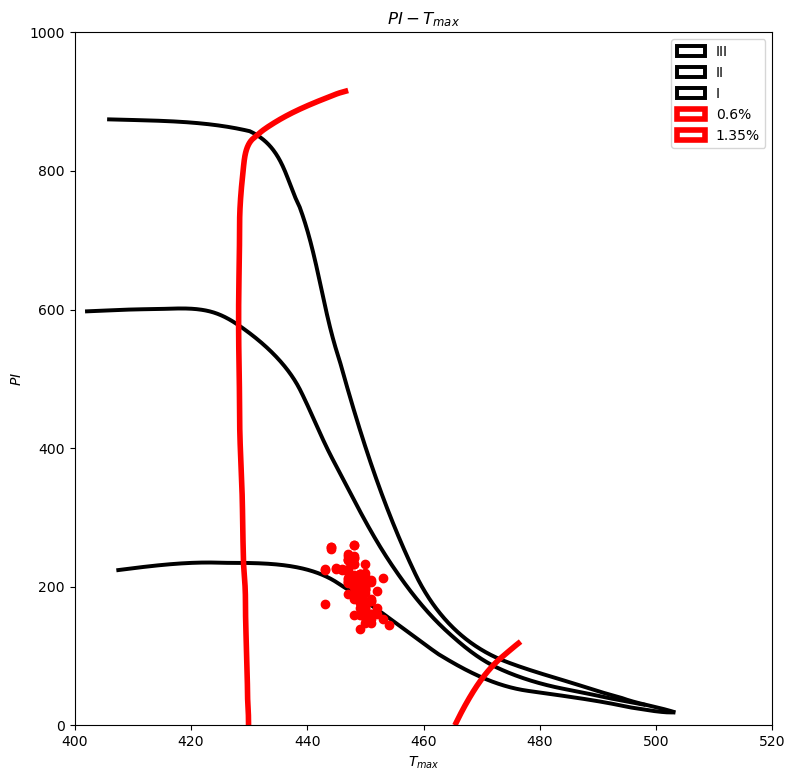

In [ ]:
fig, ax = my_plot.plot(title="$PI-T_{max}$", labels=("$T_{max}$", "$PI$"), figsize=(9, 9), add_points=True);

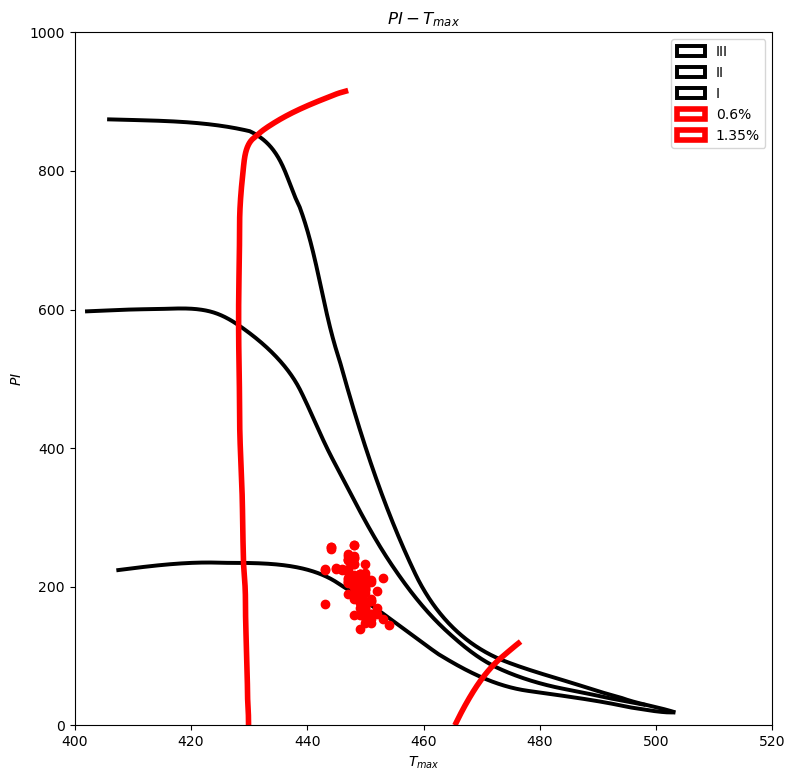

In [ ]:
fig

In [ ]:
my_plot.get_k_distances(2)

defaultdict(dict,
            {'(449.0, 139.0)': {'Curve Label MATTER TYPE: III': (1,
               7.530037862692478),
              'Curve Label MATTER TYPE: II': (2, 14.467433879051143)},
             '(447.0, 189.0)': {'Curve Label MATTER TYPE: III': (1,
               1.241870012959844),
              'Curve Label MATTER TYPE: II': (2, 11.14352974514431)},
             '(445.0, 226.0)': {'Curve Label MATTER TYPE: III': (1,
               5.158392708322073),
              'Curve Label MATTER TYPE: II': (2, 9.944797896239667)},
             '(445.0, 227.0)': {'Curve Label MATTER TYPE: III': (1,
               5.556810392664203),
              'Curve Label MATTER TYPE: II': (2, 9.863843410200074)},
             '(447.0, 205.0)': {'Curve Label MATTER TYPE: III': (1,
               1.6693038578342698),
              'Curve Label MATTER TYPE: II': (2, 9.710073776523963)},
             '(448.0, 217.0)': {'Curve Label MATTER TYPE: III': (1,
               5.171494921405744),
            

In [ ]:
my_plot.classify_area()

{'(1.0, 1.39)': <AutoPyro.core.plots.Label at 0x281f314f760>,
 '(2.9, 5.47)': <AutoPyro.core.plots.Label at 0x281f44c6e60>,
 '(4.8, 10.86)': <AutoPyro.core.plots.Label at 0x281f3abdf00>,
 '(4.8, 10.9)': <AutoPyro.core.plots.Label at 0x281f3abdf60>,
 '(3.92, 8.04)': <AutoPyro.core.plots.Label at 0x281f3abd870>,
 '(5.0, 12.23)': <AutoPyro.core.plots.Label at 0x281f3abe5c0>,
 '(5.1, 11.86)': <AutoPyro.core.plots.Label at 0x281f3abd360>,
 '(4.8, 11.73)': <AutoPyro.core.plots.Label at 0x281f3abde40>,
 '(5.0, 12.87)': <AutoPyro.core.plots.Label at 0x281f314d5d0>,
 '(5.0, 12.9)': <AutoPyro.core.plots.Label at 0x281f314d5a0>,
 '(4.06, 8.8)': <AutoPyro.core.plots.Label at 0x281f314d300>,
 '(5.0, 11.92)': <AutoPyro.core.plots.Label at 0x281f314d960>,
 '(4.2, 8.76)': <AutoPyro.core.plots.Label at 0x281f314c100>,
 '(4.4, 10.57)': <AutoPyro.core.plots.Label at 0x281f314d8d0>,
 '(4.5, 11.7)': <AutoPyro.core.plots.Label at 0x281f314c490>,
 '(3.61, 7.59)': <AutoPyro.core.plots.Label at 0x281f314d990>,

In [11]:
from copy import deepcopy
from itertools import chain
from typing import Any, Optional, Self

import numpy as np
import numpy.typing as npt
import geopandas as gpd
from shapely import Geometry, Point
from shapely.geometry import mapping, shape

class Label:
    __slots__ = "name", "value"

    def __init__(self, name: str, value: str | int) -> None:
        super().__init__()
        self.name = name
        self.value = value

    def __str_value(self):
        return (
            ", ".join(self.value)
            if isinstance(self.value, (list, tuple))
            else self.value
        )

    def __str__(self) -> str:
        return f"{self.__class__.__name__} " f"{self.name}: {self.__str_value()}"

    def string(self, name: bool = False) -> str:
        value = self.__str_value()

        if name:
            return f"{self.name}: {value}"

        return str(value)

    def copy(self):
        return Label(self.name, self.value)

    @classmethod
    def from_dict(cls, init_dict: dict[str, Any]) -> Self:
        return cls(**init_dict)
    
    def to_dict(self, values_only: bool = True) -> dict[str, Any]:
        slots = chain.from_iterable(
            getattr(cls, "__slots__", tuple()) for cls in reversed(type(self).__mro__)
        )

        return {
            slot: (
                deepcopy(getattr(self, slot))
                if values_only
                else {
                    "value": (value := deepcopy(getattr(self, slot))),
                    "class": value.__class__.__name__,
                }
            )
            for slot in slots
        }


class LabelGeometry:
    __slots__ = "geometry", "label"

    def __init__(self, geometry: Geometry, label: Optional[Label] = None) -> None:
        super().__init__()
        self.geometry = geometry
        self.label = label
        # self.style = Style()

    def __array__(self) -> npt.NDArray[Any]:
        # np.asarray(self.geometry, dtype=np.object_)
        return np.asarray(self.geometry.coords)

    def __str__(self) -> str:
        return f"{str(self.geometry)} -> {str(self.label)}"

    def __getattr__(self, attr):
        return getattr(self.geometry, attr)

    def __iter__(self):
        yield self.geometry.coords

    @property
    def __geo_interface__(self) -> dict[str, Any]:
        # return mapping(self.geometry)
        return gpd.GeoDataFrame(
            self.label.to_dict(), geometry=[self.geometry], index=[0]
        ).__geo_interface__

    @classmethod
    def make(
        cls, geometry: Geometry, *geometry_args, label: Optional[Label] = None
    ) -> None:
        return cls(geometry=geometry(*geometry_args), label=label)

    @classmethod
    def from_dict(cls, init_dict: dict[str, Any]) -> Self:
        # return cls(shape(init_dict))
        series = gpd.GeoDataFrame.from_features(init_dict).iloc[0]

        return cls(geometry=series.pop("geometry"), label=Label.from_dict(series.to_dict()))

    # def to_dict(self):
    #     return mapping(self.geometry)

    def has_label(self) -> bool:
        return bool(self.label)

In [13]:
my_point = LabelGeometry.make(Point, 0, 0, label=Label("Cool", 1))

['self', 'name', 'value']

In [14]:
Label("Cool", 1).to_dict(False)

{'name': {'value': 'Cool', 'class': 'str'},
 'value': {'value': 1, 'class': 'int'}}

In [15]:
my_point.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'name': 'Cool', 'value': 1},
   'geometry': {'type': 'Point', 'coordinates': (0.0, 0.0)},
   'bbox': (0.0, 0.0, 0.0, 0.0)}],
 'bbox': (0.0, 0.0, 0.0, 0.0)}

In [16]:
str(my_point)

'POINT (0 0) -> Label Cool: 1'

In [18]:
print(LabelGeometry.from_dict(my_point))

POINT (0 0) -> Label Cool: 1
